<a href="https://colab.research.google.com/github/kreshuklab/teaching-dl-course-2023/blob/main/webinar1/image_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Manipulation Tutorial

We are going to work with Kaggle 2018 Data Science Bowl data.  
To start with go the [data webpage](https://www.kaggle.com/c/data-science-bowl-2018) and read the data description. To make it easier, we're going to work with a subset of it. 

## Downloading the data - BAND

Data used in webinars is already downloaded and can be found in `/scratch/dl-course-data`

In [1]:
data_dir = "/scratch/dl-course-data/webinar1"

In [2]:
import os
os.path.exists(data_dir)

True

Remember that you can execute any bash command from the Notebook if you preceed the command name with '!'. Use { } to insert Python variables into bash commands:

In [3]:
!echo {data_dir}

/scratch/dl-course-data/webinar1


## Downloading the data - Colab 
If you work with these notebooks using Colab or other environment, you can download data to any location, for example, in the current directory.

In [ ]:
import os

if os.getenv("COLAB_RELEASE_TAG"):
    data_dir = "./"
else:
    raise RuntimeError("Skip the entire section 'Downloading the data - Colab' since not running on Google Colab.")

Now let's download the data.

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1O66UElt2ZfhLXUKKX_nTxmIXh6fMA2rT' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1O66UElt2ZfhLXUKKX_nTxmIXh6fMA2rT" -O {data_dir}/kaggle_data.zip && rm -rf /tmp/cookies.txt

And please check whether the downloaded archive is around 80M (the value after the progress bar [ <=> ]). If the value is much smaller, rerun the previous cell - probably something failed. 

Those of you who like bash can play around with unzipping the data into nice folders. The rest of you can just run the following:


In [ ]:
!unzip -qq {data_dir}/kaggle_data.zip -d {data_dir} && rm {data_dir}/kaggle_data.zip && rm {data_dir}/stage1_test.zip
!mkdir {data_dir}/nuclei_data && unzip -qq {data_dir}/stage1_train.zip -d {data_dir}/nuclei_data/ && rm {data_dir}/stage1_train.zip

## Check the data

Don't forget that you can always check what is happening in your directory using `ls` :

In [4]:
!ls {data_dir}

nuclei_data


In [5]:
!ls {data_dir}/nuclei_data

00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552
003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1
00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e
0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed
01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf
0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21
0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426
02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339
03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776
03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe
03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a
0402a81e75262469925ea893b6706183832e85324f7b1e08e634129f5d522cdd
04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e
05040e2e959c3f5632558fc9683fec88f0010026c555b499066346f67fdd0e13
0532c64c2fd0c4d3188cc751cdfd566b1cfba3d269358717295bab1504c7c275
05a8f65ebd0b30d3b210f30b4

Wow, that was a loooot of folders. Hint: you can clear the output of the cell by clicking the 'clear output' button below the 'run cell'.

Now let's check what they contain by taking one random folder name:




In [6]:
!ls {data_dir}/nuclei_data/eb1df8ed879d04b36980b0958a0e8fc446ad08c0bdcf3b5f42e3db023187c7e5

images	masks


In [7]:
!ls {data_dir}/nuclei_data/eb1df8ed879d04b36980b0958a0e8fc446ad08c0bdcf3b5f42e3db023187c7e5/images

eb1df8ed879d04b36980b0958a0e8fc446ad08c0bdcf3b5f42e3db023187c7e5.png


Okay, this one contains a png image. __TASK:__ Check other random folder names to make sure the structure is the same.

## Displaying images

Now we want to load some pictures and look at them. For this we would need the following libraries:

In [4]:
# we want to show images directly in the notebook
%matplotlib inline
import os       # to list folders content
import numpy as np    # scientific computing 
import matplotlib.pyplot as plt   # plotting and visualisation
import scipy
import skimage    # image processing library, works with images as numpy arrays
import skimage.feature
import skimage.filters
import skimage.io
import skimage.morphology
import skimage.transform
plt.rcParams['figure.figsize'] = [12, 8]  # set default figure size for matplotlib plots

In [5]:
# Let's load a random image 
image_path = os.path.join(data_dir, 'nuclei_data/eb1df8ed879d04b36980b0958a0e8fc446ad08c0bdcf3b5f42e3db023187c7e5/images/eb1df8ed879d04b36980b0958a0e8fc446ad08c0bdcf3b5f42e3db023187c7e5.png')
image = skimage.io.imread(image_path)

In [6]:
# Since images are read as numpy arrays, we can check their shape and data type numpy-style
print(image.shape) # note that this is an RGBA image (has 4 channels)
print(image.dtype)

(256, 320, 4)
uint8


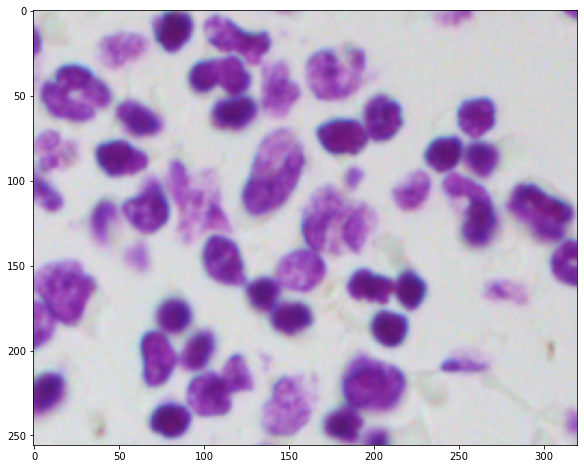

In [7]:
# Now let's visualize the image
plt.imshow(image)

If we want to have a better overview of what is happening in the folder, loading the images one by one is not the best approach. What we will do now is list all the folders we have, and write a function that will load an image file from a random folder.

In [10]:
nuclei_data_path = os.path.join(data_dir, 'nuclei_data')
folders_list = os.listdir(nuclei_data_path)  # get the list of all the folders inside nuclei_data
print(folders_list[0])   # let's see how the folder names look like

0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426


In [33]:
!ls {os.path.join(nuclei_data_path, folders_list[0])}

images	masks


In [13]:
from pathlib import Path

def show_random_image(dir_list):
  rand_idx = np.random.randint(0, len(dir_list))   # get a random index
  name = dir_list[rand_idx]
  img_path = str(Path(nuclei_data_path)/name/'images'/name)+'.png'
  print(rand_idx)
  random_image = skimage.io.imread(img_path)
  plt.imshow(random_image)

607


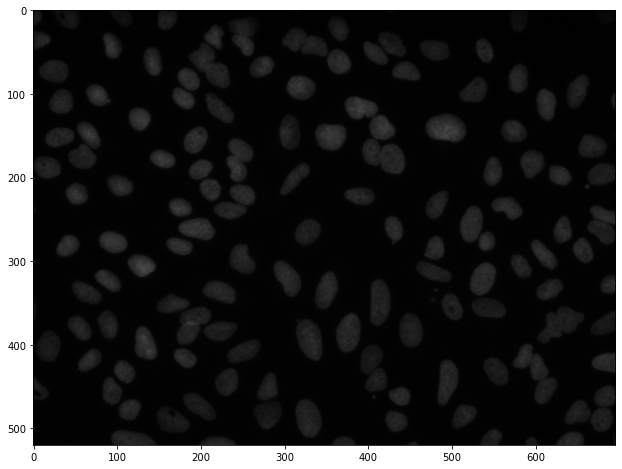

In [14]:
# Now test your function and see how the images in your folder look like
show_random_image(folders_list)

## Operations on images

Now let's look more into the operations that you can perform on your image. Firstly, let's write a function that visualises two images at the same time to examine the transformations visually.

In [52]:
def show_two_images(image1, image2):
    f, axarr = plt.subplots(1, 2)   # we need two images in a row
    axarr[0].imshow(image1)
    axarr[1].imshow(image2)
    _ = [ax.axis('off') for ax in axarr]   # remove the axis ticks
    plt.show()

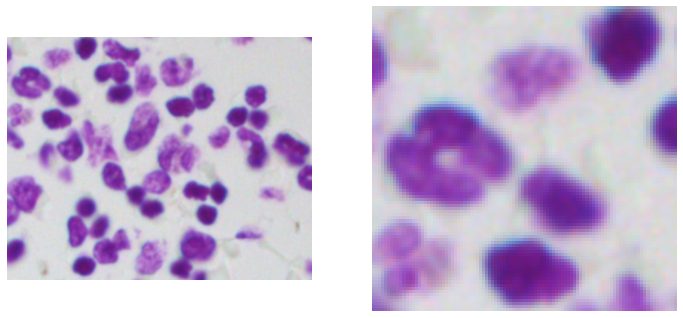

In [53]:
# Now let's crop the upper left corner of the image and visualize it next to the original image
show_two_images(image, image[:100, :100])

Looks fine. Now let's go through some common image transformations.

## Converting to greyscale
If you have looked through enough random images from the folder, you might have noticed some of them are colored and some are gray-scale. If we want to build a generic pipeline that processes all of them, we might need to convert the coloured ones to grayscale as well. Also, we will invert the image to have 0 as background and 1 as signal

(256, 320)


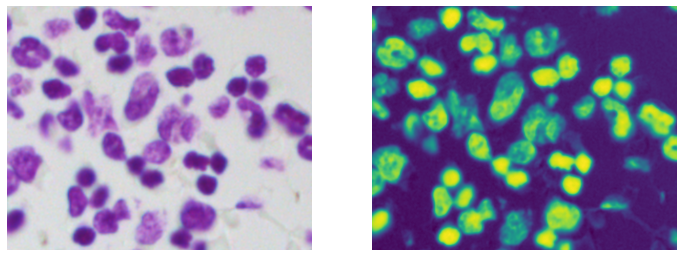

In [57]:
grey_image = skimage.color.rgb2gray(skimage.color.rgba2rgb(image))
print(grey_image.shape) # now we see that 4 channels are gone
grey_image = 1 - grey_image
show_two_images(image, grey_image)

As you can see from the second image, by default matplotlib is using 'viridis' colormap to display grayscale images. 

**TASK**: change the cmap parameter in `imshow` function to display the second image in greyscale (use 'Greys' colormap)


(256, 320)


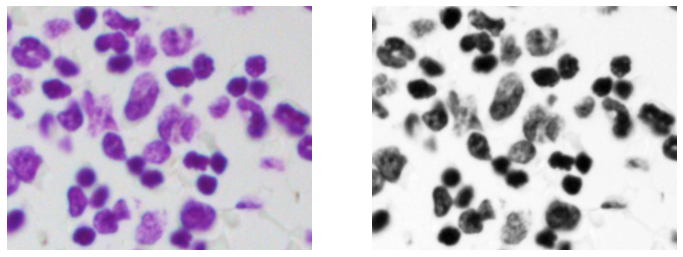

In [16]:
#TASK
def show_two_images(image1, image2):
    f, axarr = plt.subplots(1, 2)   # we need two images in a row
    axarr[0].imshow(image1)
    axarr[1].imshow(image2, cmap='Greys')
    _ = [ax.axis('off') for ax in axarr]   # remove the axis ticks
    plt.show()

grey_image = skimage.color.rgb2gray(skimage.color.rgba2rgb(image))
print(grey_image.shape) # now we see that 4 channels are gone
grey_image = 1 - grey_image
show_two_images(image, grey_image)


## Rescaling

(512, 640)


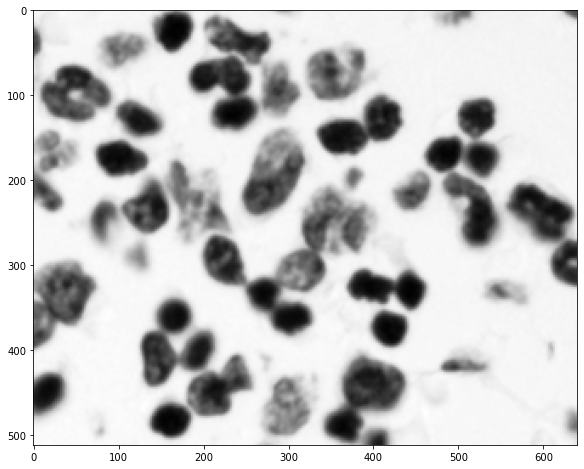

In [58]:
rescaled_image = skimage.transform.rescale(grey_image, scale=2, order=0)
print(rescaled_image.shape) # the image now is twice larger 
plt.imshow(rescaled_image, cmap='Greys')

**TASK** : try different interpolation orders. Which orders produce smoother images? 

Hint: for visualization crop small regions of the image to see more subtle differences (e.g. `show_two_images(img1[:100, :100], img2[:100, :100])`) 

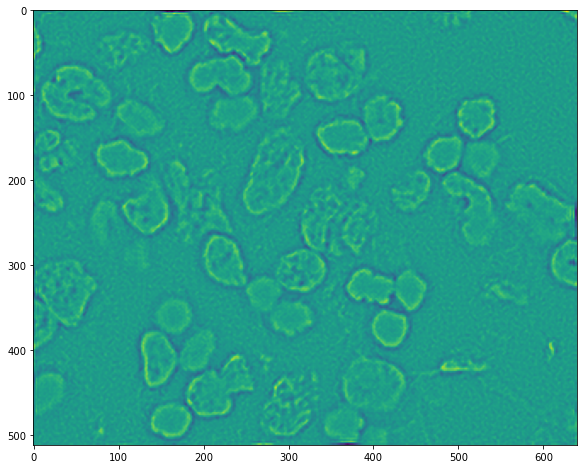

In [19]:
img1 = skimage.transform.rescale(grey_image, scale=2, order=1)
img2 = skimage.transform.rescale(grey_image, scale=2, order=2)
img3 = skimage.transform.rescale(grey_image, scale=2, order=3)
img4 = skimage.transform.rescale(grey_image, scale=2, order=4)
img5 = skimage.transform.rescale(grey_image, scale=2, order=5)

diff = img5 - img1
plt.imshow(diff)

**TASK** : find an skimage function that does the same, but instead of scale factor accepts output shape as a parameter 

In [20]:
skimage.transform.resize?

Signature:
skimage.transform.resize(
    image,
    output_shape,
    order=None,
    mode='reflect',
    cval=0,
    clip=True,
    preserve_range=False,
    anti_aliasing=None,
    anti_aliasing_sigma=None,
)
Docstring:
Resize image to match a certain size.

Performs interpolation to up-size or down-size N-dimensional images. Note
that anti-aliasing should be enabled when down-sizing images to avoid
aliasing artifacts. For downsampling with an integer factor also see
`skimage.transform.downscale_local_mean`.

Parameters
----------
image : ndarray
    Input image.
output_shape : tuple or ndarray
    Size of the generated output image `(rows, cols[, ...][, dim])`. If
    `dim` is not provided, the number of channels is preserved. In case the
    number of input channels does not equal the number of output channels a
    n-dimensional interpolation is applied.

Returns
-------
resized : ndarray
    Resized version of the input.

Other parameters
----------------
order : int, optional
  

Advanced **TASK**: modify `show_two_images` to show n images - given a list of any number of images the function should plot all of them in a row. Visualise multiple interpolations orders at the same time.

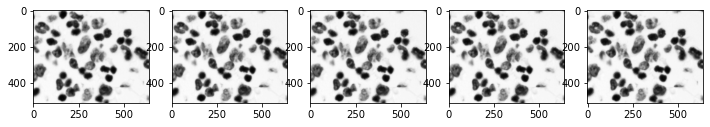

In [28]:
def show_images(images, **kwargs):
    fix, ax = plt.subplots(ncols=len(images))
    for i, img in enumerate(images):
        ax[i].imshow(img, **kwargs)
    
show_images([img1, img2, img3, img4, img5], cmap='Greys')

## Flipping image

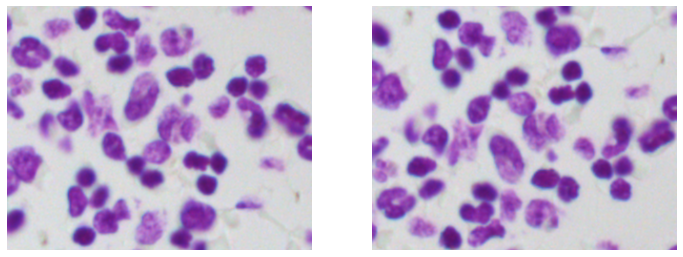

In [29]:
flipped_image = np.flip(image, axis=0)
show_two_images(image, flipped_image)

## Rotating image 

**TASK**: use `skimage.transform.rotate` to rotate your image and visualise it


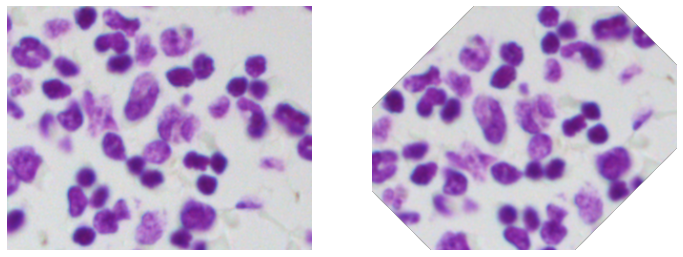

In [32]:
# Your code here
rotated_image = skimage.transform.rotate(image, 45) #  Your code here
show_two_images(image, rotated_image)

**TASK**: write a function that given an image and a number N will rotate the image by a random angle in range (0, N) degrees

49.69872811260429


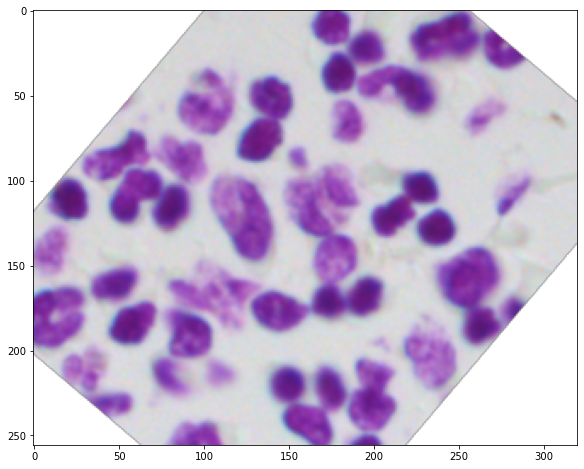

In [37]:
def random_rotate(image):
    angle = np.random.rand() * 360
    print(angle)
    rotated_image = skimage.transform.rotate(image, angle)
    return rotated_image

plt.imshow(random_rotate(image))


## Thresholding image
In simple cases you can get an object mask (segment your object) using plain thresholding + connected components. Let's see how good it works for our images. Note, that here we will work on the greyscale version

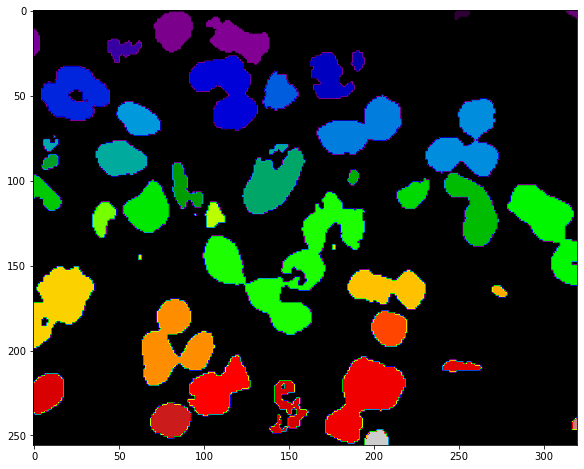

In [38]:
threshold = 0.5
thresholded_image = grey_image > threshold 
cells_labels = skimage.measure.label(thresholded_image)
plt.imshow(cells_labels, cmap='nipy_spectral')
plt.show()

**TASK** : try different thresholds. Do you manage to get the objects properly separated? 


In [41]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(grey_image)
print(thresh)

0.40914430836397053


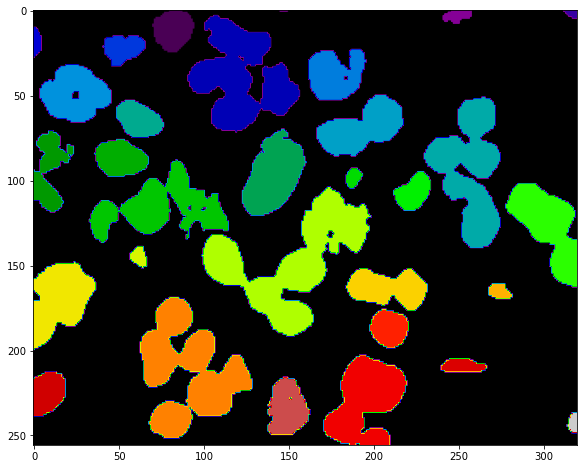

In [49]:
threshold = 0.4
thresholded_image = grey_image > threshold 
cells_labels = skimage.measure.label(thresholded_image)
plt.imshow(cells_labels, cmap='nipy_spectral')
plt.show()

Let's plot a histogram of image values to see whether there is a good cutoff between background and objects

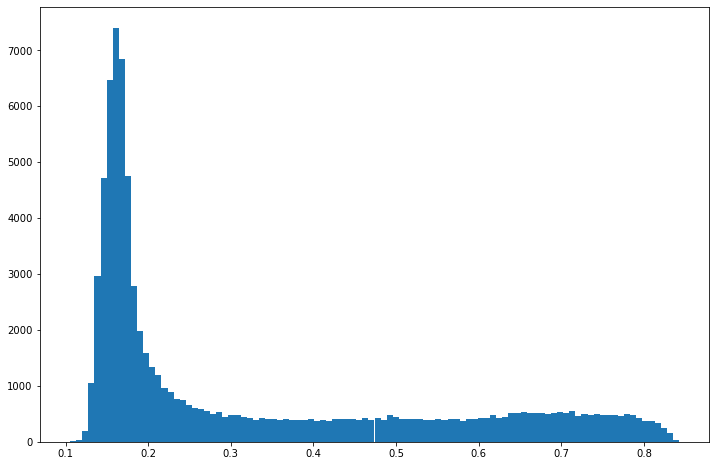

In [50]:
plt.hist(grey_image.flatten(), bins=100)
plt.show()

Doesn't loook like we can define a clear threshold here. Let's try more sophisticated methods

**TASK** : Smooth the image with Gaussian filter (`skimage.filters.gaussian`) and try different thresholds again. Does it look better?

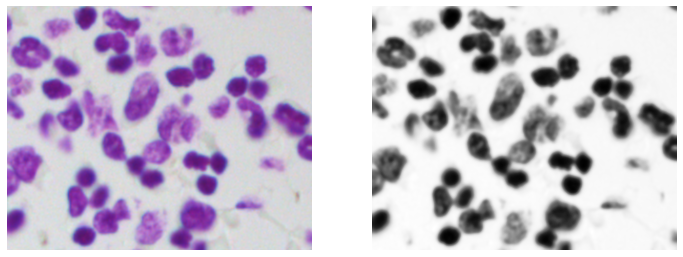

In [51]:
gaussian_smoothed_image = skimage.filters.gaussian(grey_image)
show_two_images(image, gaussian_smoothed_image)

The object boundaries look smoother, but there are still many objects we are not able to split fully. 
**TASK** : take a look at other thresholding methods offered by skimage. Hint: many of them can be visualized with `skimage.filters.try_all_threshold`

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<AxesSubplot:title={'center':'Original'}>,
        <AxesSubplot:title={'center':'Isodata'}>,
        <AxesSubplot:title={'center':'Li'}>,
        <AxesSubplot:title={'center':'Mean'}>,
        <AxesSubplot:title={'center':'Minimum'}>,
        <AxesSubplot:title={'center':'Otsu'}>,
        <AxesSubplot:title={'center':'Triangle'}>,
        <AxesSubplot:title={'center':'Yen'}>], dtype=object))

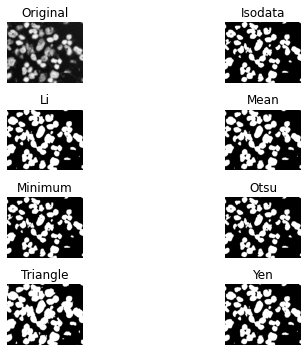

In [52]:
skimage.filters.try_all_threshold(grey_image)



## Morphological Transformations
The masks we got out of tresholding look suboptimal. There are small objects and some masks are merged together. We can try to alleviate there problems with such morphological transformation as opening - errosion followed by dilation (a good explanation [here](https://www.youtube.com/watch?v=uUweXBmm978)).

Let's see how it looks like.

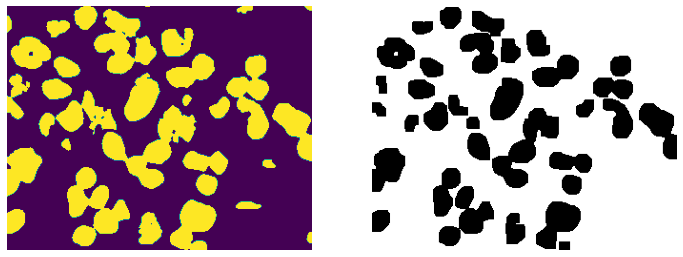

In [53]:
# we need to set a structuring element (https://www.youtube.com/watch?v=9lqH5XLI-V4)
kernel = np.ones((3,3), np.uint8)
opened_image = scipy.ndimage.binary_opening(thresholded_image, structure=kernel, iterations=4)
show_two_images(thresholded_image, opened_image)


As we can see, many small object disappeared and some objects got split, but not all.

**TASK**: try different number of iterations. How does it affect the segmentation masks? 

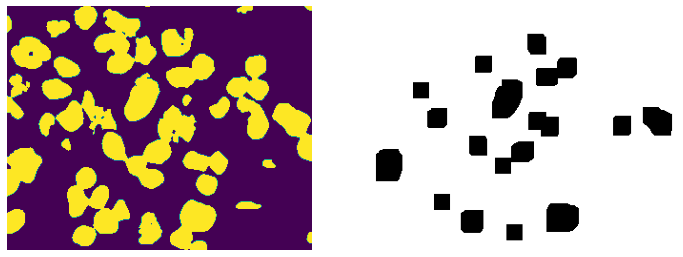

In [56]:
# eroding for more iterations before expanding will remove slightly larger small objects
# it also makes things blocky and horrible when the image is dilated again
# this is much too much for a good iteration value!

# we need to set a structuring element (https://www.youtube.com/watch?v=9lqH5XLI-V4)
kernel = np.ones((3,3), np.uint8)
opened_image = scipy.ndimage.binary_opening(thresholded_image, structure=kernel, iterations=8)
show_two_images(thresholded_image, opened_image)

**TASK**: Try closing (`scipy.ndimage.binary_closing`) to see what it does.

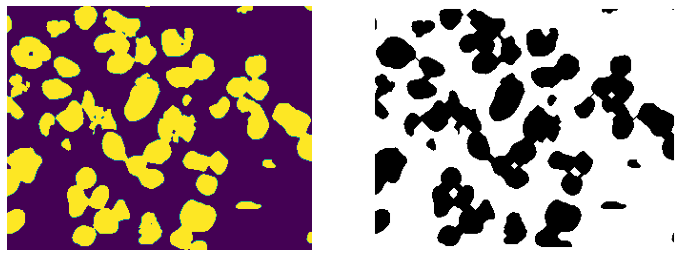

In [59]:
closed_image = scipy.ndimage.binary_closing(thresholded_image, structure=None, iterations=3)

show_two_images(thresholded_image, closed_image)

In [ ]:
# Recap
# binary opening (erosion, followed by dilation) is good for removing small pixel shot noise
# binary closing (dilation, followed by eroson) is good for removing small holes

## Finding edges 
We can also try to use image gradients to detect object edges. Let's try to use the [Canny algorithm](https://scikit-image.org/docs/dev/auto_examples/applications/plot_coins_segmentation.html#edge-based-segmentation). 

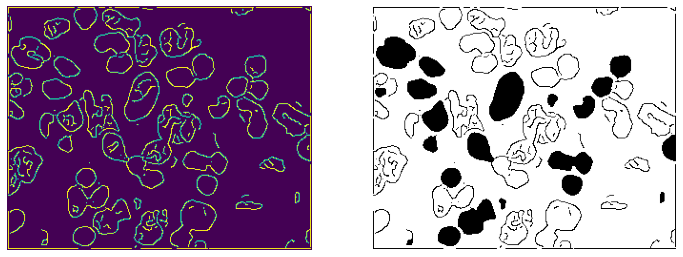

In [60]:
canny_edges = skimage.feature.canny(grey_image, sigma=1) # we get the object boundaries - 'edges'
filled_edges = scipy.ndimage.binary_fill_holes(canny_edges) # we fill the inner part to get full objects
show_two_images(canny_edges, filled_edges)

While the boundaries seem relatively good, the resulting segmentation is far from perfect, because of the small holes in the boundaries. 

**TASK** : for the Canny detecton try different `sigma`, `low_threshold` and `high_threshold`. Does any combination give good object segmentation?

Canny properties
```
sigma : float, optional
    Standard deviation of the Gaussian filter.
low_threshold : float, optional
    Lower bound for hysteresis thresholding (linking edges).
    If None, low_threshold is set to 10% of dtype's max.
high_threshold : float, optional
    Upper bound for hysteresis thresholding (linking edges).
    If None, high_threshold is set to 20% of dtype's max.
```

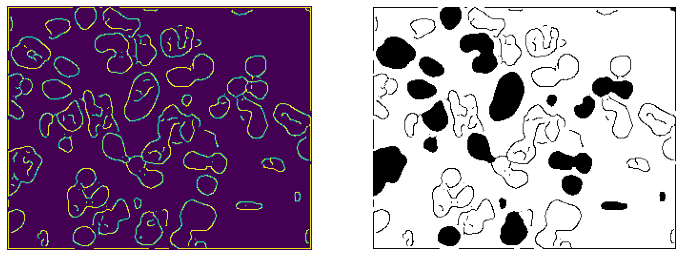

In [81]:
canny_edges = skimage.feature.canny(
    grey_image,
    sigma=2,
    low_threshold=0.05,
    high_threshold=0.15,
) # we get the object boundaries - 'edges'
filled_edges = scipy.ndimage.binary_fill_holes(canny_edges) # we fill the inner part to get full objects
show_two_images(canny_edges, filled_edges)

**Advanced TASK**: segment the image with the watershed algorithm as described in the "Segment nuclei" part of the [Segment human cells tutorial](https://scikit-image.org/docs/dev/auto_examples/applications/plot_human_mitosis.html#segment-nuclei).

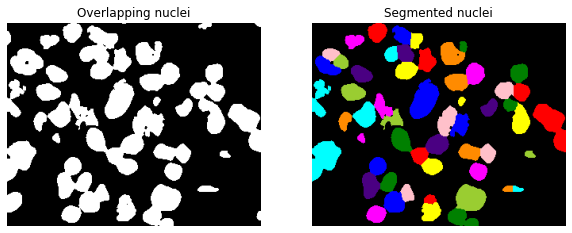

In [87]:
cells = thresholded_image

import numpy as np
import scipy.ndimage as ndi
from skimage import color, feature, measure, segmentation

# skimage eample code
distance = ndi.distance_transform_edt(cells)

local_max_coords = feature.peak_local_max(distance, min_distance=7)
local_max_mask = np.zeros(distance.shape, dtype=bool)
local_max_mask[tuple(local_max_coords.T)] = True
markers = measure.label(local_max_mask)

segmented_cells = segmentation.watershed(-distance, markers, mask=cells)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(cells, cmap='gray')
ax[0].set_title('Overlapping nuclei')
ax[0].axis('off')
ax[1].imshow(color.label2rgb(segmented_cells, bg_label=0))
ax[1].set_title('Segmented nuclei')
ax[1].axis('off')
plt.show()

In [88]:
# A much better result than tinkering around with the canny parameters!